# Electric Vehicle DataAnalysis

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [108]:
df_Original = pd.read_csv(r"C:\Users\soora\Downloads\Electric Vehicle Dataset.csv")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = df_Original.copy()

In [109]:
df.head()

,Unnamed:,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [110]:
df.tail()

,Unnamed:,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
995,995,31,Pune,None,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years"
996,996,29,Pune,None,Married,Post Graduate,4,1616287.706,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years"
997,997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
998,998,24,Ahmedabad,None,Married,Graduate,4,1764744.068,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years"
999,999,30,Pune,Business,Single,Graduate,4,2486664.468,No,Liftback,Yes,Maruti,<5 lakhs,4,"Yes, in <10 years"


#### Data Processing

In [111]:
df.isnull().sum()

Unnamed:                                                                0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of EV would you prefer?                          0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

In [112]:
df.columns

Index(['Unnamed: ', 'Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [113]:
df.shape

(1000, 15)

In [114]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [115]:
df.corr()

,Unnamed:,Age,No. of Family members,Annual Income,Preference for wheels in EV
Unnamed:,1.000,-0.004,0.009,-0.011,-0.023
Age,-0.004,1.000,0.024,-0.012,0.028
No. of Family members,0.009,0.024,1.000,0.028,-0.021
Annual Income,-0.011,-0.012,0.028,1.000,-0.023
Preference for wheels in EV,-0.023,0.028,-0.021,-0.023,1.000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Unnamed:                                                              1000 non-null   int64  
 1   Age                                                                   1000 non-null   int64  
 2   City                                                                  1000 non-null   object 
 3   Profession                                                            1000 non-null   object 
 4   Marital Status                                                        1000 non-null   object 
 5   Education                                                             1000 non-null   object 
 6   No. of Family members                                                 1000 non-null   int64  
 7 

In [117]:
df['Age'].unique()

array([ 30,  27,  32,  55,  26,  28,  23,  25,  43,  59,  21,  29,  56,
        70,  50,  24,  61,  39,  31,  40,  18,  58,  22,  96,  64,  52,
        54,  42,  49,  57,  46,  36,  20,  19,  65,  17,  60,  44,  45,
        47,  82,  33,  37,  48,  69,  67,  86,  62,  66,  34,  63,  41,
        68,  16,  53,  15, 118,  38], dtype=int64)

In [118]:
df['City'].unique()

array(['Nabha', 'Pune', 'Kashipur', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani', 'Nellore', 'Banglore', 'Faridabad',
       'Nagpur', 'Chandrapur', 'Chennai', 'Gurugram', 'Nashik',
       'Bengaluru', 'Hakdwani', 'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal',
       'Rewari', 'New Delhi', 'Serampore', 'Jhansi', 'Jalandhar',
       'nashik'], dtype=object)

In [85]:
df["City"] = df["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["City"] = df["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["City"] = df["City"].replace({"Banglore ":"Bengaluru"})
df["City"] = df["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["City"] = df["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["City"] = df["City"].replace({"nashik":"Nashik"})


In [86]:
df['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7], dtype=int64)

In [87]:
df['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [119]:
df.drop('Unnamed: ', axis=1, inplace = True)


In [124]:
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000,1000.000,1000.000,1000.000
mean,31.800,4.118,2258341.824,3.349
std,11.295,1.470,999355.758,0.888
min,15.000,0.000,-376150.863,2.000
25%,26.000,4.000,1782115.520,2.000
50%,29.000,4.000,2329246.376,4.000
75%,31.000,5.000,2753169.612,4.000
max,118.000,8.000,12821282.030,4.000


#### Data Visualization

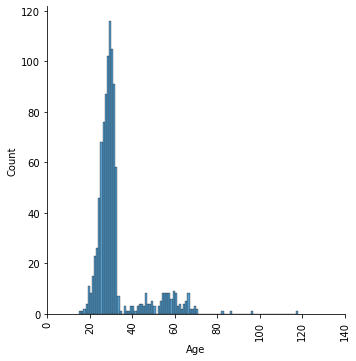

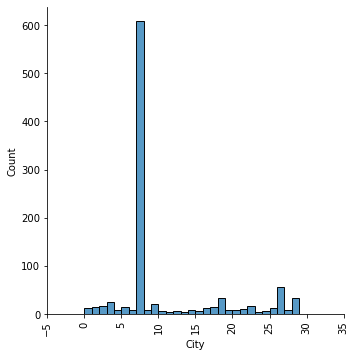

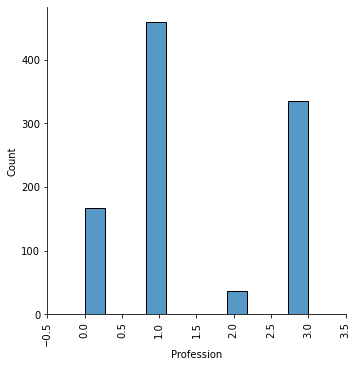

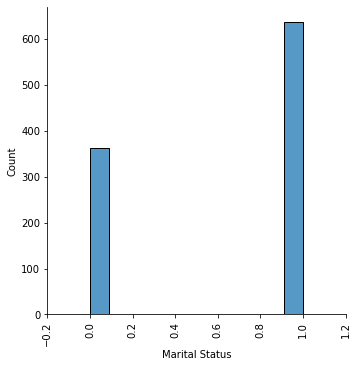

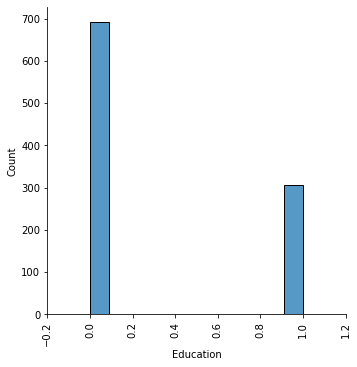

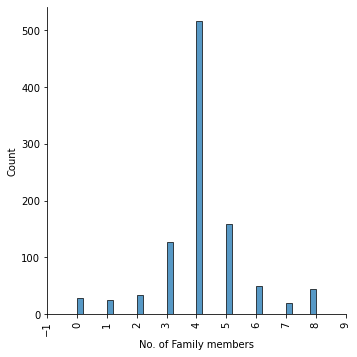

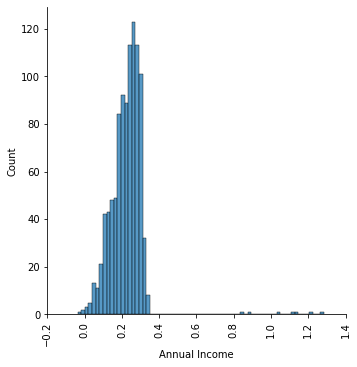

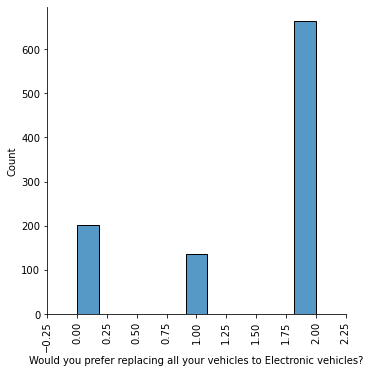

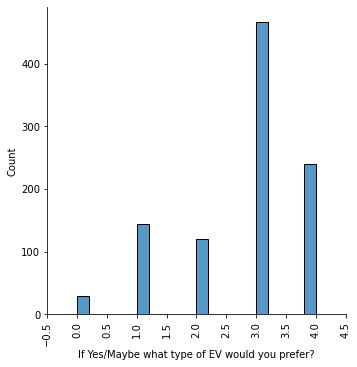

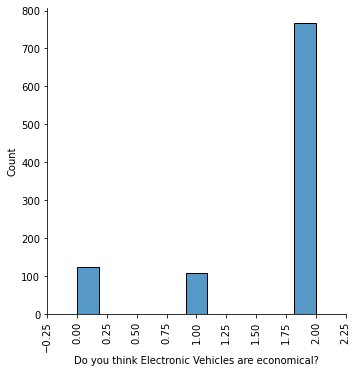

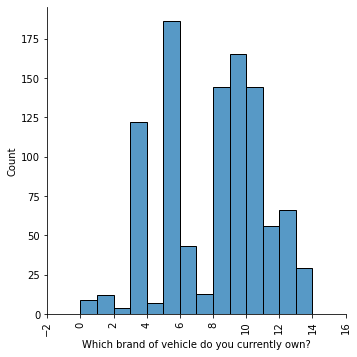

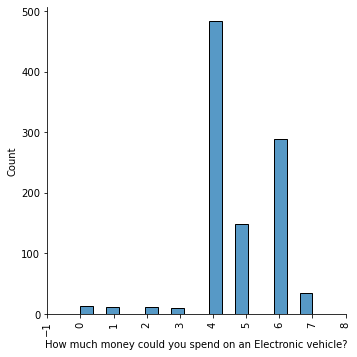

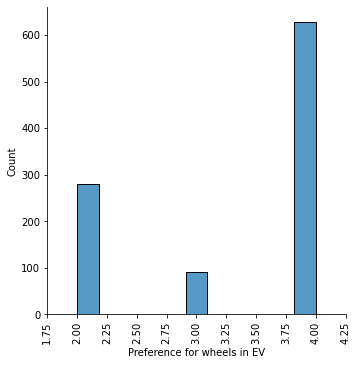

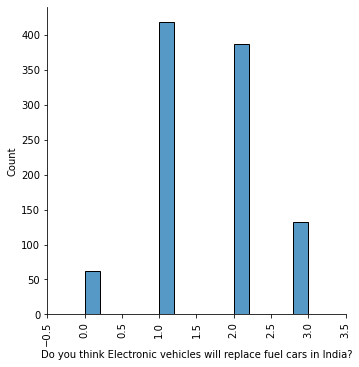

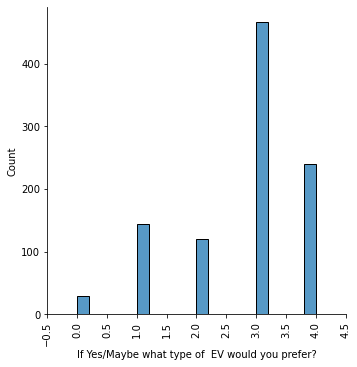

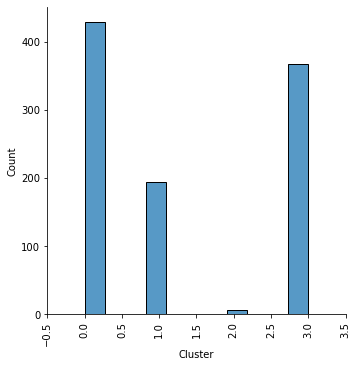

In [268]:
for col in df.columns:
    ax= sns.displot(df[col])
    ax.set_xticklabels(rotation=90)  

#Most people prefer 4 wheels vehicle.

#Most people believe Electronic vehicle will replace fuel cars in India in less than 20 years.

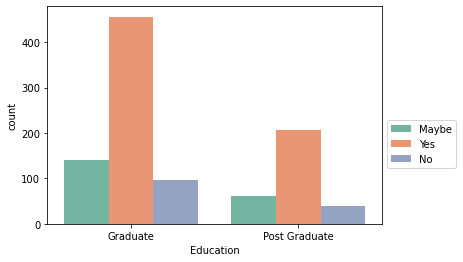

In [122]:
sns.countplot(x ='Education', hue = 'Would you prefer replacing all your vehicles to Electronic vehicles?',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

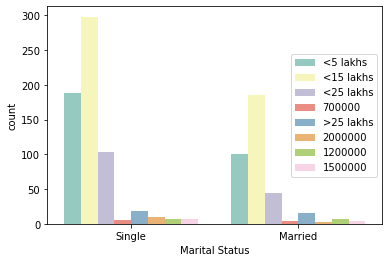

In [123]:
sns.countplot(x ='Marital Status', hue = 'How much money could you spend on an Electronic vehicle?',  data = df, palette = 'Set3')
plt.legend(loc='center right')
plt.show()

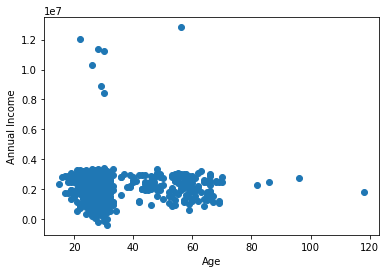

In [125]:
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.scatter(df['Age'],df['Annual Income'])

<AxesSubplot:xlabel='Age', ylabel='count'>

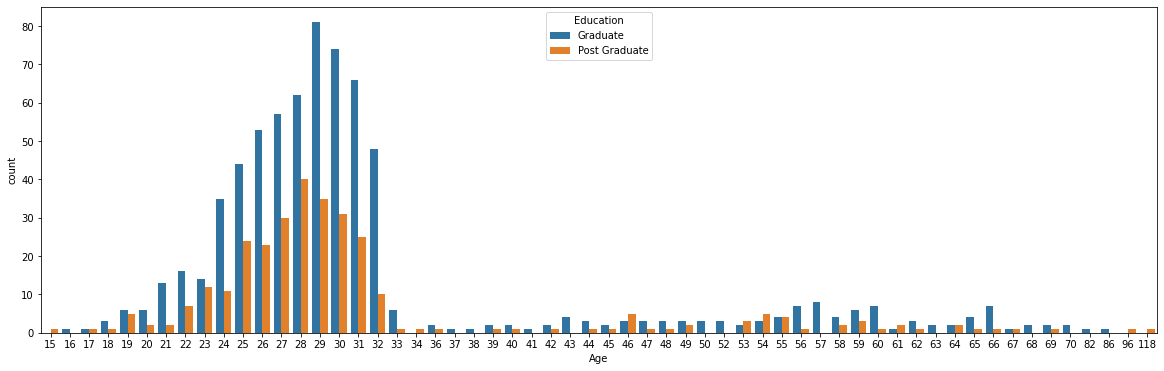

In [126]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")

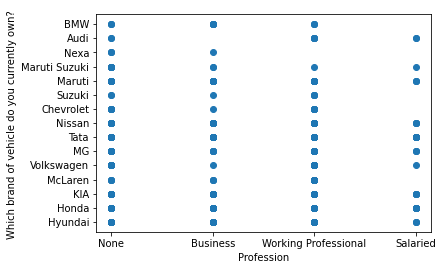

In [127]:
plt.xlabel('Profession')
plt.ylabel('Which brand of vehicle do you currently own? ')
plt.scatter(df['Profession'],df['Which brand of vehicle do you currently own?'])


<AxesSubplot:xlabel='Which brand of vehicle do you currently own?', ylabel='count'>

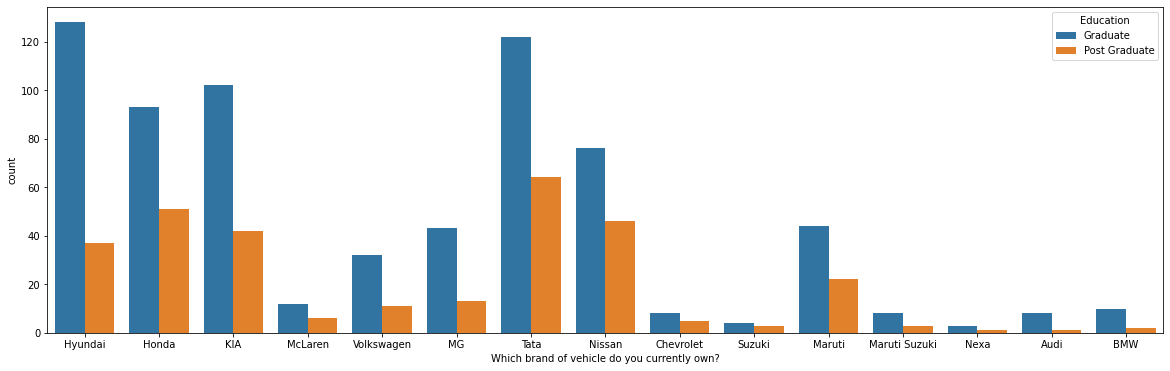

In [128]:
plt.figure(figsize=(20,6))
sns.countplot(x="Which brand of vehicle do you currently own?", data=df, hue="Education")

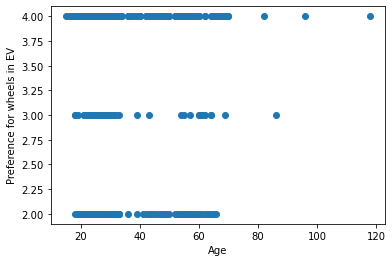

In [129]:
plt.xlabel('Age')
plt.ylabel('Preference for wheels in EV')
plt.scatter(df['Age'],df['Preference for wheels in EV'])

<AxesSubplot:>

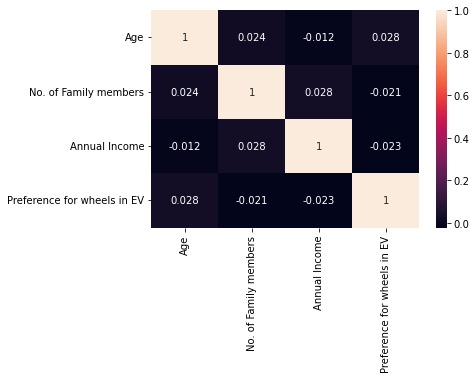

In [130]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True)

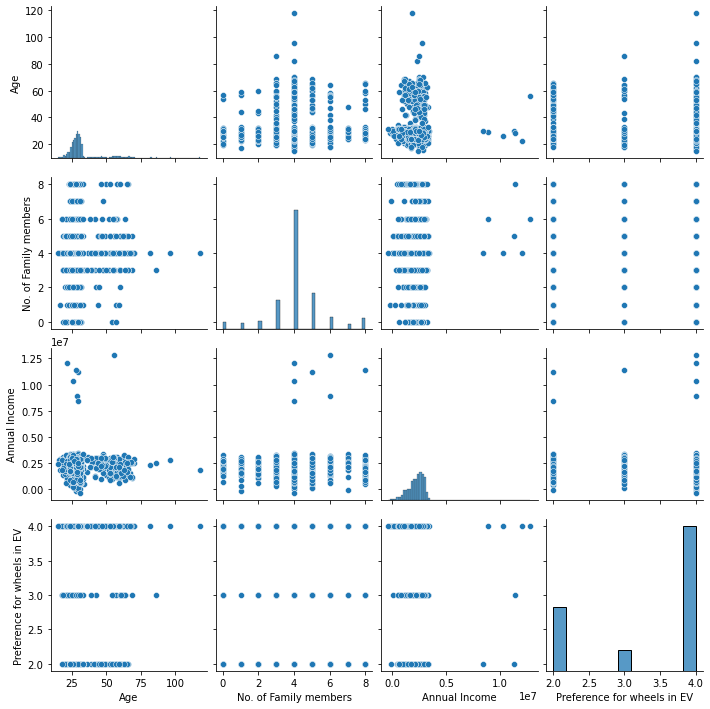

In [131]:
sns.pairplot(df)

In [133]:
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))


In [136]:
df.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

In [139]:
df['City']= label_encode(df,'City')
df['Profession']= label_encode(df,'Profession')
df['Marital Status']= label_encode(df,'Marital Status')
df['Education']= label_encode(df,'Education')
df['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df['If Yes/Maybe what type of EV would you prefer?']= label_encode(df,'If Yes/Maybe what type of EV would you prefer?')
df['Do you think Electronic Vehicles are economical?']= label_encode(df,'Do you think Electronic Vehicles are economical?')
df['Which brand of vehicle do you currently own?']= label_encode(df,'Which brand of vehicle do you currently own?')
df['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df,'Do you think Electronic vehicles will replace fuel cars in India?')
df['How much money could you spend on an Electronic vehicle?']= label_encode(df,'How much money could you spend on an Electronic vehicle?')

In [140]:
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,If Yes/Maybe what type of EV would you prefer?
0,30,27,1,1,0,5,1193875.647,0,3,2,9,6,2,0,3
1,27,7,1,1,0,4,1844540.398,2,3,2,8,4,4,2,3
2,32,25,1,1,0,4,2948150.113,2,1,2,10,4,4,2,1
3,55,7,0,1,0,3,2832379.739,0,1,1,9,6,4,1,1
4,26,9,1,1,0,4,2638750.576,2,4,2,14,4,4,2,4


In [141]:
X = df.iloc[:,:-1]

#### K MEANS MODEL

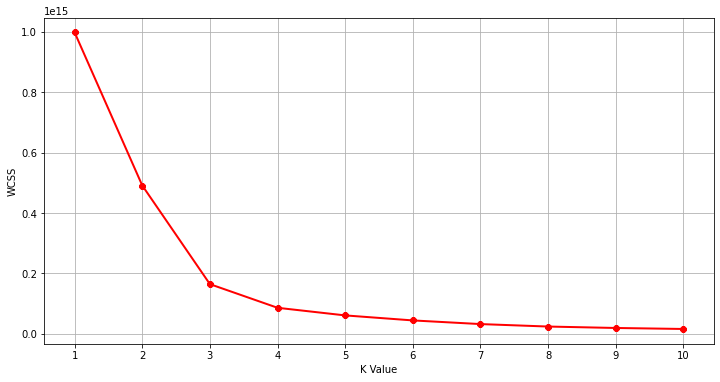

In [142]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


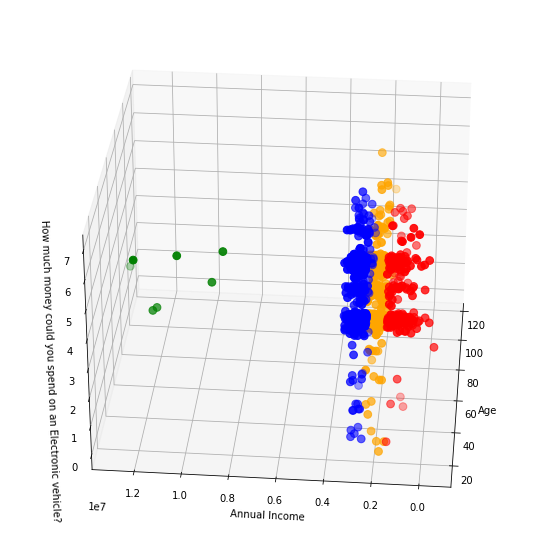

In [143]:
km = KMeans(n_clusters=4, random_state=28)
clusters = km.fit_predict(df)
df["Cluster"] = clusters

df_Original["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income"][df.Cluster == 0], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income"][df.Cluster == 1], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income"][df.Cluster == 2], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income"][df.Cluster == 3], df["How much money could you spend on an Electronic vehicle?"][df.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()

In [145]:
df1=df_Original.copy()
df1

,Unnamed:,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so,1
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",3
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years",0
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years",0
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,Pune,None,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years",3
996,996,29,Pune,None,Married,Post Graduate,4,1616287.706,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years",3
997,997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",3
998,998,24,Ahmedabad,None,Married,Graduate,4,1764744.068,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years",3


In [147]:
df1["City"] = df1["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df1["City"] = df1["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df1["City"] = df1["City"].replace({"Banglore ":"Bengaluru"})
df1["City"] = df1["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df1["City"] = df1["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df1["City"] = df1["City"].replace({"nashik":"Nashik"})

In [148]:
df1['Cluster'].value_counts() 

0    430
3    368
1    195
2      7
Name: Cluster, dtype: int64

## More customers belong to Cluster 0 & 3

### Cluster 2 & 1 has very less customers

In [149]:
Cluster_0 = df1[df1.Cluster==0]
Cluster_1 = df1[df1.Cluster==1]
Cluster_2 = df1[df1.Cluster==2]
Cluster_3 = df1[df1.Cluster==3]
Cluster_2.shape

(7, 16)

In [150]:
[Cluster_0['Age'].value_counts().head(3), 
 Cluster_1['Age'].value_counts().head(3), 
 Cluster_2['Age'].value_counts().head(3), 
 Cluster_3['Age'].value_counts().head(3)]

[29    47
 28    43
 30    43
 Name: Age, dtype: int64,
 31    28
 30    23
 29    23
 Name: Age, dtype: int64,
 30    2
 26    1
 29    1
 Name: Age, dtype: int64,
 29    45
 28    42
 30    37
 Name: Age, dtype: int64]

### Based on Cluster 0 & 3, Age group of 28-31 are to be targeted 

In [151]:
[Cluster_0['City'].value_counts().head(),
 Cluster_1['City'].value_counts().head(), 
 Cluster_2['City'].value_counts().head(), 
 Cluster_3['City'].value_counts().head()]

[Pune         279
 New Delhi     28
 Mumbai        23
 Haldwani      10
 Nagpur         9
 Name: City, dtype: int64,
 Pune         107
 Mumbai        14
 New Delhi     11
 Haldwani       6
 Chennai        6
 Name: City, dtype: int64,
 Pune         4
 Mumbai       2
 Ahmedabad    1
 Name: City, dtype: int64,
 Pune         231
 New Delhi     18
 Mumbai        17
 Haldwani      11
 Satara         9
 Name: City, dtype: int64]

#Pune & Mumbai are present in all the clusters, 

#New Delhi & Haldwani are present in 3 of 4 clusters,

#Satara & Bengaluru are present in 1 of the 4 clusters. 

#### 1. 'Pune' & 'Mumbai' are the most suitable location to create the early market in EV segment.
#### 2. 'New Delhi' & 'Haldwani' should be next priority.
#### 3. Followed by 'Satara' & 'Bengaluru'.

### The City should also have enough charging stations, will try to analyse Sanctioned Charging stations in India Dataset 

In [152]:
[Cluster_0['Profession'].value_counts().head(), 
 Cluster_1['Profession'].value_counts().head(), 
 Cluster_2['Profession'].value_counts().head(), 
 Cluster_3['Profession'].value_counts().head()]

[None                    207
 Working Professional    135
 Business                 73
 Salaried                 15
 Name: Profession, dtype: int64,
 None                    87
 Working Professional    68
 Business                32
 Salaried                 8
 Name: Profession, dtype: int64,
 None                    5
 Working Professional    1
 Business                1
 Name: Profession, dtype: int64,
 None                    161
 Working Professional    132
 Business                 61
 Salaried                 14
 Name: Profession, dtype: int64]

#### Salaried people are very less interested in EV vehicles.

 

In [153]:
[Cluster_0['Annual Income'].mean(), 
 Cluster_1['Annual Income'].mean(), 
 Cluster_2['Annual Income'].mean(), 
 Cluster_3['Annual Income'].mean()]

[2812149.7606093045, 1097632.5625656918, 10737228.10357143, 2064995.8703315218]

### Cluster 0 customers have Higher Average Income(Rs. 2812149.76), Cluster 1 & 2 have lower Average Income

In [154]:
[Cluster_0['Marital Status'].value_counts().head(), 
 Cluster_1['Marital Status'].value_counts().head(), 
 Cluster_2['Marital Status'].value_counts().head(), 
 Cluster_3['Marital Status'].value_counts().head()]

[Single     283
 Married    147
 Name: Marital Status, dtype: int64,
 Single     133
 Married     62
 Name: Marital Status, dtype: int64,
 Married    5
 Single     2
 Name: Marital Status, dtype: int64,
 Single     220
 Married    148
 Name: Marital Status, dtype: int64]

In [155]:
m=Cluster_3[Cluster_3['Marital Status']=='Single']
m['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes      147
Maybe     40
No        33
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

### Single Marital Status people should be Targeted 

In [157]:
[Cluster_0['No. of Family members'].value_counts().head(), 
 Cluster_1['No. of Family members'].value_counts().head(), 
 Cluster_2['No. of Family members'].value_counts().head(), 
 Cluster_3['No. of Family members'].value_counts().head()]

[4    231
 5     63
 3     59
 6     22
 2     14
 Name: No. of Family members, dtype: int64,
 4    88
 5    37
 3    22
 6    14
 8    12
 Name: No. of Family members, dtype: int64,
 4    3
 6    2
 5    1
 8    1
 Name: No. of Family members, dtype: int64,
 4    194
 5     57
 3     46
 8     22
 6     12
 Name: No. of Family members, dtype: int64]

### Family with 3-5 members are more interested in EV. 

In [158]:
[Cluster_0['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_1['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_2['Which brand of vehicle do you currently own?'].value_counts().head(), 
 Cluster_3['Which brand of vehicle do you currently own?'].value_counts().head()]

[Tata       78
 Hyundai    70
 Honda      65
 KIA        61
 Nissan     53
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       36
 Hyundai    33
 KIA        28
 Honda      26
 Nissan     22
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       3
 KIA        1
 MG         1
 Honda      1
 Hyundai    1
 Name: Which brand of vehicle do you currently own?, dtype: int64,
 Tata       69
 Hyundai    61
 KIA        54
 Honda      52
 Nissan     47
 Name: Which brand of vehicle do you currently own?, dtype: int64]

### education Analysis of  EV customers 

In [159]:
[Cluster_0['Education'].value_counts().head(),
 Cluster_1['Education'].value_counts().head(), 
 Cluster_2['Education'].value_counts().head(), 
 Cluster_3['Education'].value_counts().head()]

[Graduate         298
 Post Graduate    132
 Name: Education, dtype: int64,
 Graduate         130
 Post Graduate     65
 Name: Education, dtype: int64,
 Graduate         5
 Post Graduate    2
 Name: Education, dtype: int64,
 Graduate         260
 Post Graduate    108
 Name: Education, dtype: int64]

In [160]:
e=Cluster_3[Cluster_3['Education']=='Graduate']
e['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes      176
Maybe     50
No        34
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

In [161]:
y= df_Original['Would you prefer replacing all your vehicles to Electronic vehicles?']
z=df_Original['Cluster']
x = list(zip(y, z))

i = pd.DataFrame(x,columns=['Would you prefer replacing all your vehicles to Electronic vehicles?', 'Cluster'])
(i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Yes').sum() + (i['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Maybe').sum()

864

864 customers out of 1000 are intersted in EV.

Graduates are more interested in replacing vehicles to EV

###  value count of How much money could you spend on an Electronic vehicle 

In [163]:
print(Cluster_0['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_1['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_2['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_3['How much money could you spend on an Electronic vehicle?'].value_counts().head())

<15 lakhs    216
<5 lakhs     127
<25 lakhs     49
>25 lakhs     15
1200000        7
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    102
<5 lakhs      53
<25 lakhs     29
>25 lakhs      5
1200000        3
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    3
<5 lakhs     3
<25 lakhs    1
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    162
<5 lakhs     105
<25 lakhs     69
>25 lakhs     14
700000         6
Name: How much money could you spend on an Electronic vehicle?, dtype: int64


#### Cluster 0 & 3 have more number of customers(770). Condidering only 0 & 3 clusters,

#### 378 out of 770 that is 49.09% of people only wants to spend <15 lakhs for EV.
#### 232 out of 770 that is 30.12% of people only wants to spend <5 lakhs.
#### 118 out of 770 that is 15.32% of people only wants to spend <25 lakhs.

49.09% of people only wants to spend <15 lakhs for EV

Only 5.47% of people willing to spend more than 25 lakhs.

By this,we can infer most customers want to invest less than 15 lakhs for their EV.

### The dataset provides the statewise number of electric vehicles being used on the roads of India as on April 2022.

The complete data of Andhra Pradesh, Madhya Pradesh, Telangana and Lakshadweep is not available.

In [247]:
Active_EV = pd.read_csv(r"C:\Users\soora\Downloads\EV_India.csv")
Active_EV.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"


In [249]:
c = ['Total Electric Vehicle','Total Non-Electric Vehicle','Total']
le= LabelEncoder()
for i in c:
    Active_EV[i]=le.fit_transform(Active_EV[i].astype(str))

In [250]:
Active_EV.isnull().sum()


Sr. No.                       0
State Name                    0
Total Electric Vehicle        0
Total Non-Electric Vehicle    0
Total                         0
dtype: int64

In [251]:
Active_EV

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,5,4,4
1,2,Andra Pradesh,31,32,32
2,3,Arunachal Pradesh,8,12,12
3,4,Assam,26,24,24
4,5,Bihar,29,0,0
5,6,Chandigarh,14,28,28
6,7,Chhattisgarh,9,27,27
7,8,Delhi,2,29,29
8,9,Goa,20,7,7
9,10,Gujarat,21,11,11


In [252]:
Active_EV.dropna(axis="rows", how="any", inplace=True)
Active_EV

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,5,4,4
1,2,Andra Pradesh,31,32,32
2,3,Arunachal Pradesh,8,12,12
3,4,Assam,26,24,24
4,5,Bihar,29,0,0
5,6,Chandigarh,14,28,28
6,7,Chhattisgarh,9,27,27
7,8,Delhi,2,29,29
8,9,Goa,20,7,7
9,10,Gujarat,21,11,11


In [253]:
Active_EV.isnull().sum()

Sr. No.                       0
State Name                    0
Total Electric Vehicle        0
Total Non-Electric Vehicle    0
Total                         0
dtype: int64

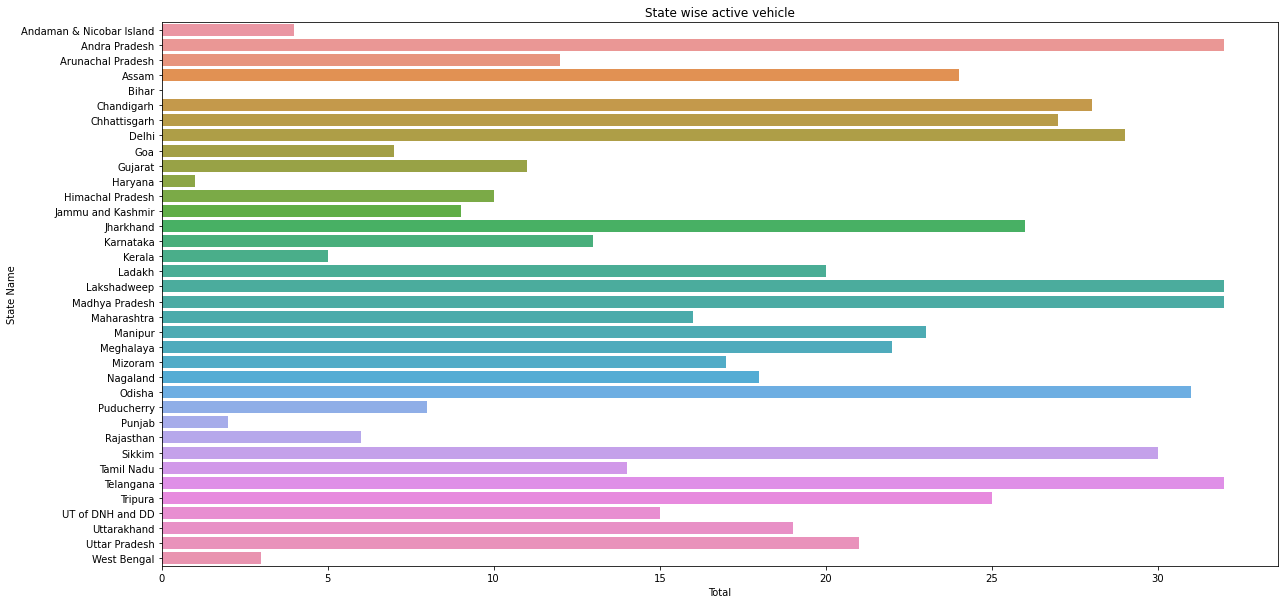

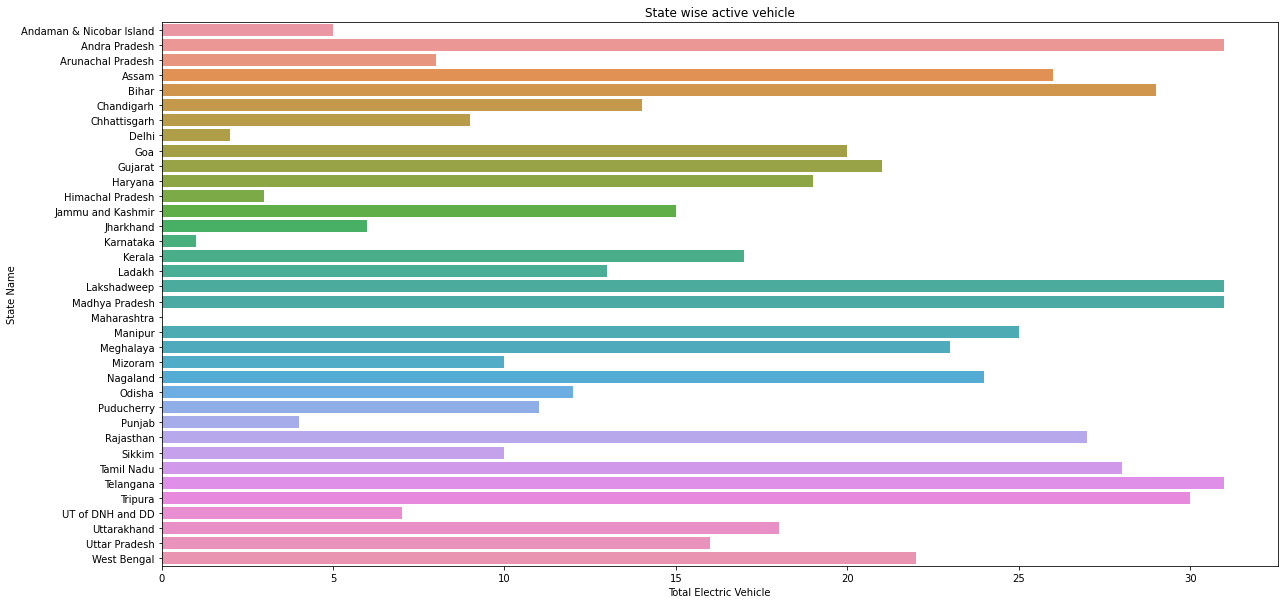

In [254]:
plt.rcParams['figure.figsize'] = (20, 10)
f = sns.barplot(y=Active_EVs['State Name'], x=Active_EV['Total'])
plt.title('State wise active vehicle')
plt.show()


plt.rcParams['figure.figsize'] = (20, 10)
f = sns.barplot(y=Active_EV['State Name'], x=Active_EV['Total Electric Vehicle'])
plt.title('State wise active vehicle')
plt.show()

Text(0.5, 1.0, 'Total Active Vehecles Vs Total active EVs')

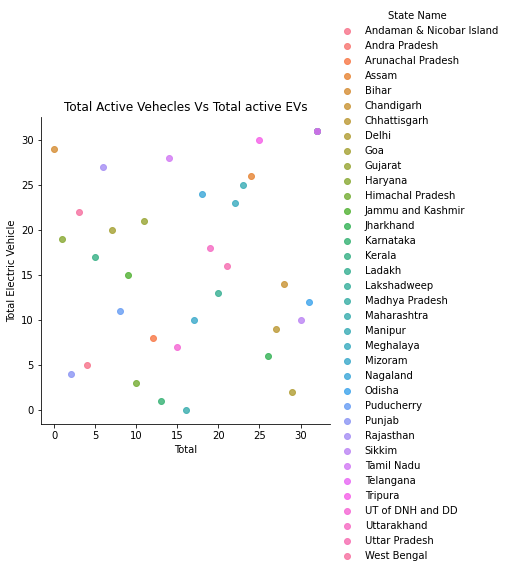

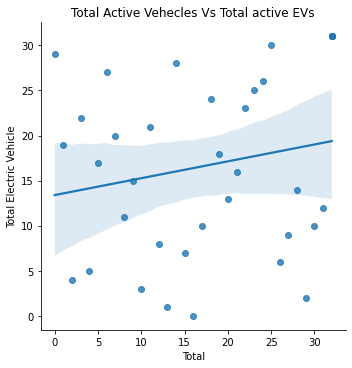

In [256]:
sns.lmplot(data=Active_EV, y="Total Electric Vehicle", x="Total", hue='State Name')
plt.title('Total Active Vehecles Vs Total active EVs')

sns.lmplot(data=Active_EV, y="Total Electric Vehicle", x="Total")
plt.title('Total Active Vehecles Vs Total active EVs')

### Analysis on Highway wise charging station 

In [261]:
Highwise_df= pd.read_csv(r"C:\Users\soora\Downloads\Highway charging Stations.csv",encoding='cp1252')
Highwise_df.head()

,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,Expressways,Mumbai - Pune,10
1,Expressways,Ahmadabad - Vadodara,10
2,Expressways,Delhi Agra Yamuna,20
3,Expressways,Bengaluru Mysore,14
4,Expressways,Bangaluru-Chennai,30


In [262]:
Highwise_df.tail()

,Category,Expressways/Highways,EV Charging Stations Sanctioned
21,Highways,Chennai - Trivendram,74
22,Highways,Chennai-Ballary,62
23,Highways,Chennai - Nagpur,114
24,Highways,Mangaldai - Wakro,64
25,Total,Total,1576


In [264]:
Highwise_df.drop(Highwise_df.index[25], inplace= True)
Highwise_df.tail()

,Category,Expressways/Highways,EV Charging Stations Sanctioned
20,Highways,Chennai-Bhubaneswar,120
21,Highways,Chennai - Trivendram,74
22,Highways,Chennai-Ballary,62
23,Highways,Chennai - Nagpur,114
24,Highways,Mangaldai - Wakro,64


In [265]:
Highwise_df.isnull().sum()

Category                           0
Expressways/Highways               0
EV Charging Stations Sanctioned    0
dtype: int64

<AxesSubplot:xlabel='EV Charging Stations Sanctioned', ylabel='Expressways/Highways'>

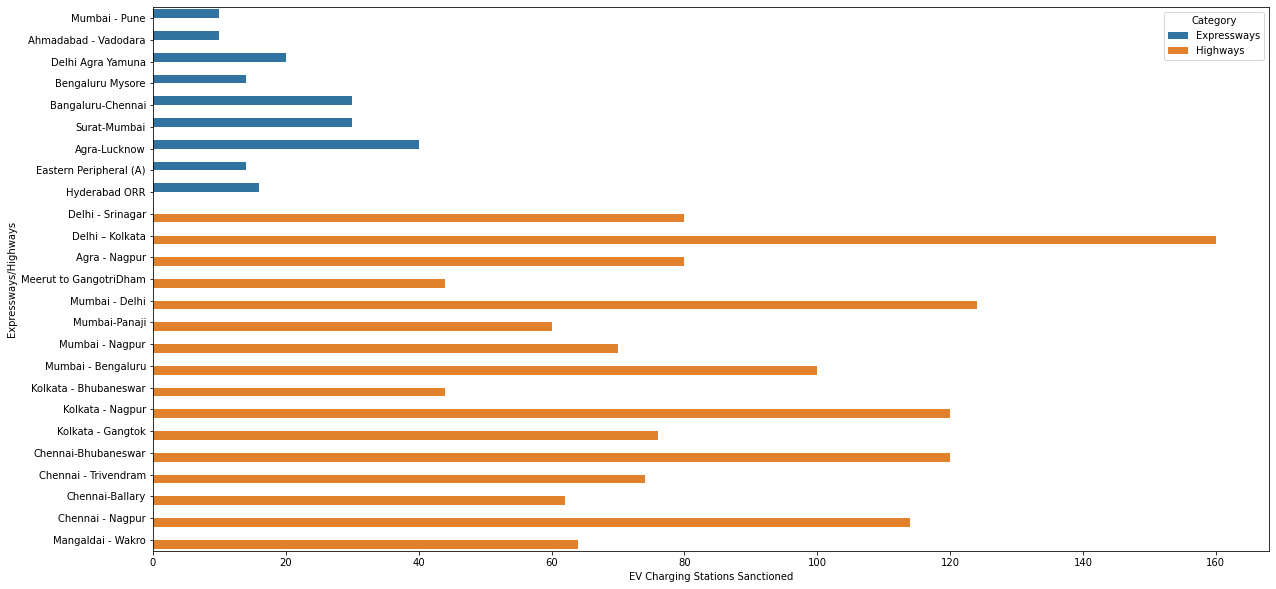

In [267]:
sns.barplot(x=Highwise_df["EV Charging Stations Sanctioned"], y=Highwise_df['Expressways/Highways'] , hue=Highwise_df["Category"])

### Demographic segments
-Age
Target Age group of 28-31

-Income
Target who earn Rs. 20,64,995 to Rs. 28,12,149 per year.

-Education
Target Graduates.

### Geographic segments
- Location
Pune, Mumbai, New Delhi, Bengaluru Considering based on Segmentation Analysis and the Infrastructres sanctioned by Govt.

### Psychographic segments
-Lifestyle
Target Single Marital Status, Family with 3-5 members